In [1]:
# Firstly we need to import the necessary libraries
 
import pandas as pd # Pandas is used for analysis and manipulation of data 
import numpy as np  # Numpy is used for numerical manipulation 
import matplotlib.pyplot as plt  # Matplot is used to visualize the data in charts and graphs
from plotly.subplots import make_subplots # This is used for making subplots 
import plotly.graph_objects as go # This is used to render plots as objects in a notebook 

import datetime as dt# Used for maipulating date and time 

# Prophet model 
from prophet import Prophet # This is the library that focused on time series data 
from prophet.plot import add_changepoints_to_plot # This function allows you to visualize the changepoints detected by prophet 
from sklearn.metrics import mean_absolute_error  # This module is used to evaluate prophet models 


C:\Users\decla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'sklearn'

In [3]:
# Were now going to Load in the dataset 
# Im using the twitter stock price data 2022 - 2023 from kaggle
# load and print the dataset
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('TWITTER.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Generate descriptive statistics of the DataFrame
print(df.describe())

# Print a concise summary of the DataFrame and check for missing values
print(df.info())

# Convert the "Date" column to datetime
df["Date"] = pd.to_datetime(df['Date'])


         Date       Open       High        Low      Close  Adj Close  \
0  2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1  2013-11-08  45.930000  46.939999  40.689999  41.650002  41.650002   
2  2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3  2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4  2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

      Volume  
0  117701600  
1   27925300  
2   16113900  
3    6316700  
4    8688300  
              Open         High          Low        Close    Adj Close  \
count  2172.000000  2172.000000  2172.000000  2172.000000  2172.000000   
mean     35.759811    36.435994    35.069503    35.732063    35.732063   
std      14.305437    14.562577    14.003070    14.269980    14.269980   
min      13.950000    14.220000    13.730000    14.010000    14.010000   
25%      24.822500    25.549999    24.129999    24.862501    24.862501   
50%      34.900002    35.430000  

In [6]:
# We're now going to explore some daata visulisation using plotly to make subplots  
import pandas as pd 
from plotly.subplots import make_subplots  # Import make_subplots from plotly.subplots
import plotly.graph_objects as go

df = pd.read_csv('TWITTER.csv')
columns = df.columns[1:]
fig = make_subplots(rows=3, cols=2, subplot_titles=columns) # creates a figure using the 'make_subplots' methods and we add the rows, collums and title 
for row in range(1, 4):
    for col in range(1, 3):
        column = columns[(row - 1) * 2 + col - 1]  # Calculate the correct index
        fig.add_trace(go.Scatter(x=df['Date'], y=df[column]), row=row, col=col) # Usinf the 'go.scatter' method and the 'add_trcae' method to pass new plots into the subplot 
fig.update_layout(height=1500, width=1000, title_text="Twitter Data", showlegend=False) # Updating the figure
fig.show()


In [7]:
# In this task, display the sum of Volume column values for each year to determine which year has the most volume of stocks.
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv('TWITTER.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
df['Year'] = df['Date'].dt.year
df_pie = df.groupby('Year')['Volume'].sum()

layout = {
    'title': 'Pie Chart for Sum of Volume Data against Each Year'}

fig = go.Figure(data=[go.Pie(labels=df_pie.index, values=df_pie.values, textinfo='label')], layout=layout)
fig.show()


In [8]:
# In this task, you'll create an OHLC (Open-High-Low-Close) chart for Twitter stock prices using Plotly to identify trends and potential trading opportunities.

import pandas as pd 
from plotly.subplots import make_subplots  # Import make_subplots from plotly.subplots
import plotly.graph_objects as go

data = go.Ohlc(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
               increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'Twitter Stocks',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2015-10-05', 'x1': '2015-10-05',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
        },
        {
        'x0': '2020-03-15', 'x1': '2020-03-15',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }
    ],
    'annotations': [{
        'x': '2015-10-05', 'y': 0.6, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Jack Dorsey becomes CEO of Twitter.'
        },
        {
        'x': '2020-03-15', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Lockdown started in USA due to Covid19.'
    }
    ]
}

fig = go.Figure(data=[data], layout=layout)
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()

In [13]:
import pandas as pd 
import plotly.graph_objects as go
import numpy as np  

after_covid = df.loc[df['Date'] > '2020-03-15']
max_value = after_covid.iloc[:, 1:-2].max().max()

g = after_covid.groupby(["Date"])
monthly_averages = g.aggregate({"Open": np.mean, "High": np.mean, "Low": np.mean, "Close": np.mean})
monthly_averages.reset_index(level=0, inplace=True)

trace = go.Candlestick(x=monthly_averages['Date'],
                       open=monthly_averages['Open'].values.tolist(),
                       high=monthly_averages['High'].values.tolist(),
                       low=monthly_averages['Low'].values.tolist(),
                       close=monthly_averages['Close'].values.tolist(),
                       increasing=dict(line=dict(color='red')),
                       decreasing=dict(line=dict(color='lightgreen')))

layout = {
    'title': 'Twitter Stocks <br> <i> After Covid </i>',
    'xaxis': {'title': 'Date',
              'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': 0, 'x1': 1,
        'y0': max_value, 'y1': max_value, 'xref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2020-03-15', 'y': 0.95, 'xref': 'x', 'yref': 'paper',
        'showarrow': False,
        'text': 'Peak Value = %f' % max_value
    }]
}

data = [trace]

fig = go.Figure(data=data, layout=layout)
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()


C:\Users\decla\AppData\Local\Temp\ipykernel_25004\1501480864.py:9: FutureWarning:

The provided callable <function mean at 0x000001A949D5B380> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



In [14]:
# The moving average is a statistic commonly used to analyze time series data. It calculates the average price of stocks over a certain period.
import pandas as pd 
import plotly.graph_objects as go
import numpy as np  

# Moving Averages (10, 50 and 200)
df['10D_avg'] = df.Close.rolling(window=10).mean()
df['50D_avg'] = df.Close.rolling(window=50).mean()
df['200D_avg'] = df.Close.rolling(window=200).mean()

# Plot
fig = make_subplots()

colors = ['#ffF500', '#E6a1cf', '#6E6E6E']
avgs = ['10D_avg', '50D_avg', '200D_avg']

fig.append_trace({'x': df["Date"], 'y': df['Close'], 'type': 'scatter', 'name': 'Close', 'line': {'color': 'green'}}, 1, 1)

for col, c in zip(avgs, colors):
    fig.append_trace({'x': df["Date"], 'y': df[col], 'type': 'scatter', 'name': col, 'line': {'color': c}}, 1, 1)

fig['layout'].update(height=800, title='Relationship between MAs and Closing Price')
    
fig.show()

In [17]:
# predict the future close prices for Twitter stocks using the Prophet model.
import pandas as pd 
import plotly.graph_objects as go
import numpy as np  

from prophet import Prophet # This is the library that focused on time series data 
from prophet.plot import add_changepoints_to_plot # This function allows you to visualize the changepoints detected by prophet 
from sklearn.metrics import mean_absolute_error  # This module is used to evaluate prophet models 


# Data frame for traning 
df2 = df[["Date", "Close"]]
df2.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
df2.head()

# Training the data set 
m = Prophet()

m.fit(df2)  

# Making the predictions 
# Create Future dates
future_prices = m.make_future_dataframe(periods=365, freq='D')

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



C:\Users\decla\AppData\Local\Temp\ipykernel_25004\3810926372.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

20:52:54 - cmdstanpy - INFO - Chain [1] start processing
20:52:54 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
2532,2023-06-20,49.114883,37.174191,61.552760
2533,2023-06-21,49.169751,37.624326,60.611296
2534,2023-06-22,49.360690,38.369301,61.030833
2535,2023-06-23,49.482674,38.376048,60.422311
2536,2023-06-24,44.344646,32.537847,55.830731


21:01:46 - cmdstanpy - INFO - Chain [1] start processing
21:01:46 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\decla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\decla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



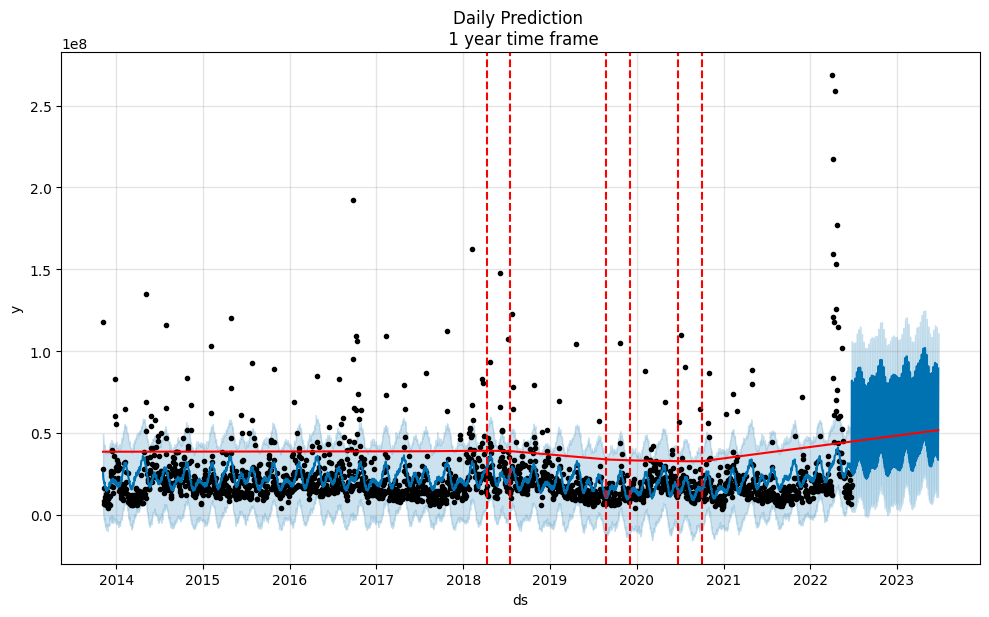

C:\Users\decla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\decla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\decla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of Da

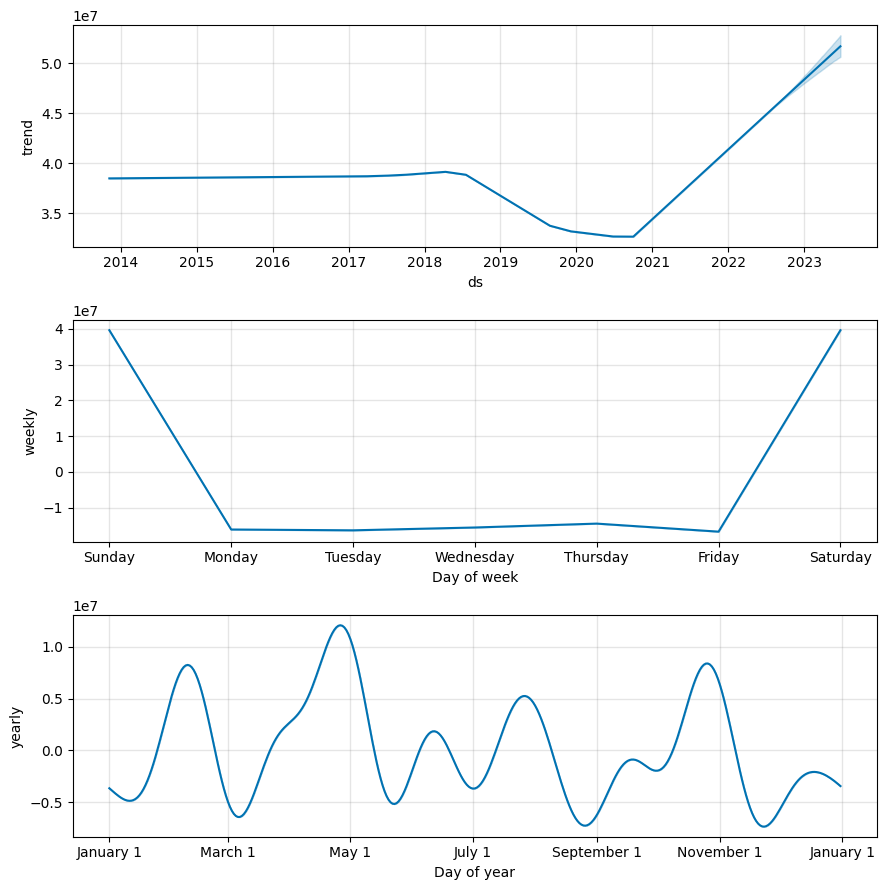

In [24]:
# Plotting the predicted values 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

# Load your data into a DataFrame (assuming your date column is named "Date" and your value column is named "Volume")
df = pd.read_csv('TWITTER.csv')
df.rename(columns={'Date': 'ds', 'Volume': 'y'}, inplace=True)  # Rename columns to match Prophet's expected column names

# Create a Prophet model and fit it to your data
m = Prophet()
m.fit(df)

# Create a future DataFrame for predictions
future = m.make_future_dataframe(periods=365)  # You can adjust the number of days

# Make predictions
forecast = m.predict(future)

# Plot the forecast and changepoints
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.title("Daily Prediction \n 1 year time frame")
plt.show()

# Plot the components of the forecast
fig = m.plot_components(forecast)
plt.show()


21:05:10 - cmdstanpy - INFO - Chain [1] start processing
21:05:10 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\decla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\decla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



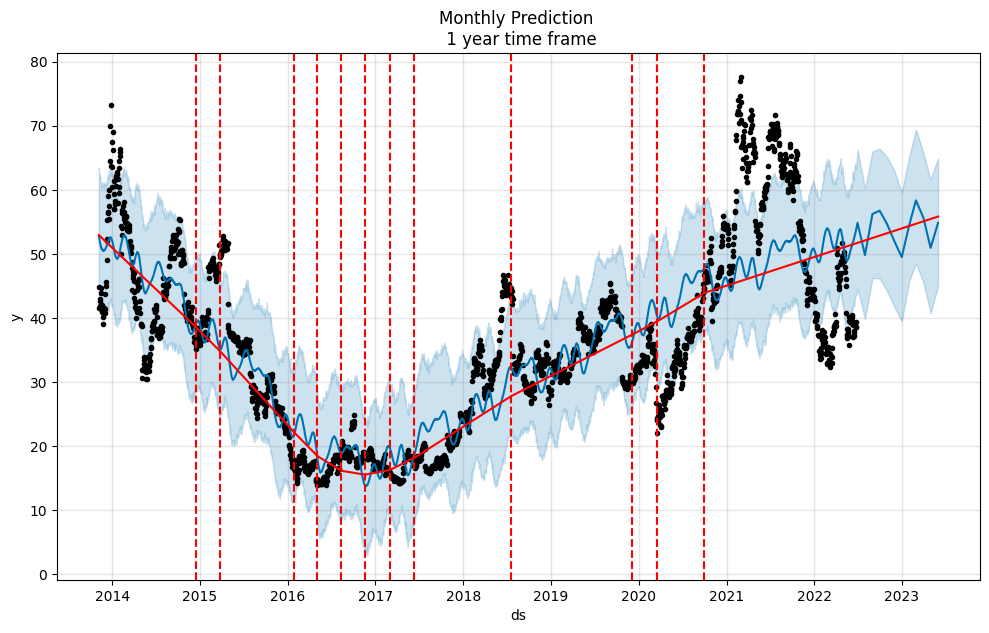

C:\Users\decla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\decla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\decla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of Da

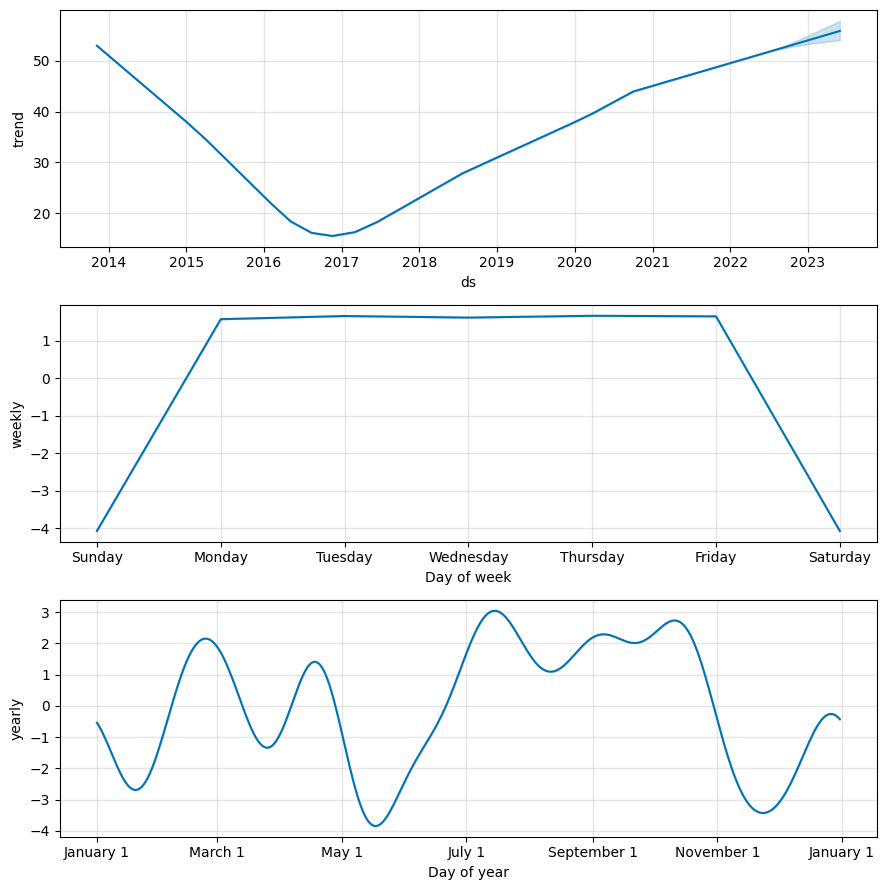

In [25]:
# forecast the close prices on a monthly basis with the aggregated values of all days in a specific month.
# Also, predict the values for the same time period i.e. one year in order to estimate a smoother trend of the data.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot


# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.03).fit(df2)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)


# Predicting datalines and changepoints 
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)
plt.title("Monthly Prediction \n 1 year time frame")
plt.show()


# Creating subplots 
fig = m.plot_components(fcst)
ax = fig.gca()
plt.show()


In [26]:
# Now we're going to use the mean absolute error method for evaluation of the Prophet model to see how well it worked on the provided dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

# Evaluate the model and print the mean absolute error. 
y_true = df2['y'].values
y_pred = fcst['yhat'][:-12].values
mae = mean_absolute_error(y_true, y_pred)
mae

# Graph for comparison 
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2['ds'], y=y_true,
                    mode='lines',
                    name='Actual'))
fig.add_trace(go.Scatter(x=df2['ds'], y=y_pred,
                    mode='lines',
                    name='Predicted'))
fig['layout'].update(title='Line chart for Actual and Predicted values')
fig.show()